In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [2]:
AX_TITLE_SIZE = 16
LABEL_SIZE = 14

In [3]:
params = {
    'text.usetex' : True,
    'font.size' : AX_TITLE_SIZE
}
plt.rcParams.update(params) 

fontP = FontProperties()
fontP.set_size(12)

In [4]:
def get_data(dist, test, small, LOOCV, maxpooling=False):
    file_name = dist
    if small:
        file_name += '_small'
    else:
        file_name += '_large'
    file_name += '_test' if test else '_train'
    if LOOCV:
        file_name += '_LOOCV'
    if maxpooling:
        file_name += '_maxpool'
    
    return np.loadtxt(r'../results/' + file_name + '.txt', delimiter=',', skiprows=1)

## Question A

In [6]:
eucl_test = get_data('euclidean', test=True, small=True, LOOCV=False)
eucl_train = get_data('euclidean', test=False, small=True, LOOCV=False)

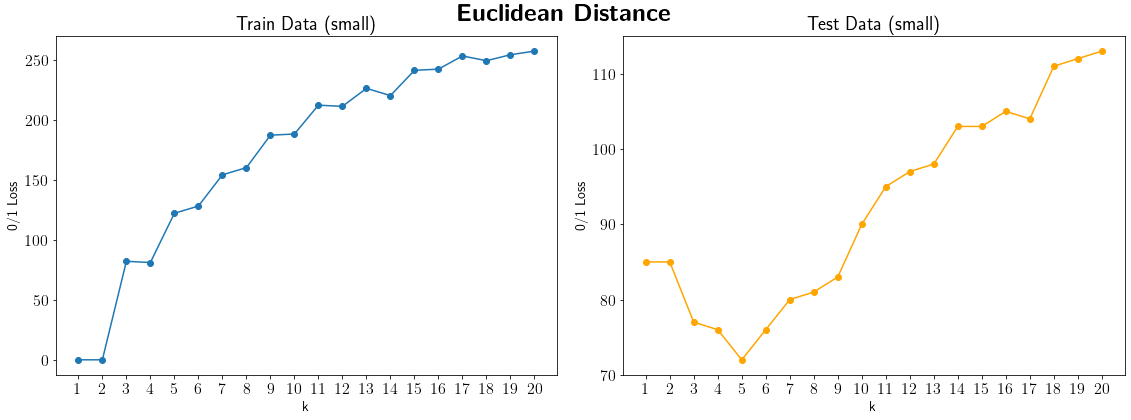

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train[:,1])+1)])
ax1.plot(eucl_train[:,1], eucl_train[:,0], marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(1, len(eucl_test[:,1])+1)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')

fig.tight_layout()
fig.savefig(
    r'../figures/QA.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question B

In [8]:
eucl_train_LOOCV = get_data('euclidean', test=False, small=True, LOOCV=True)
eucl_test = get_data('euclidean', test=True, small=True, LOOCV=False)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

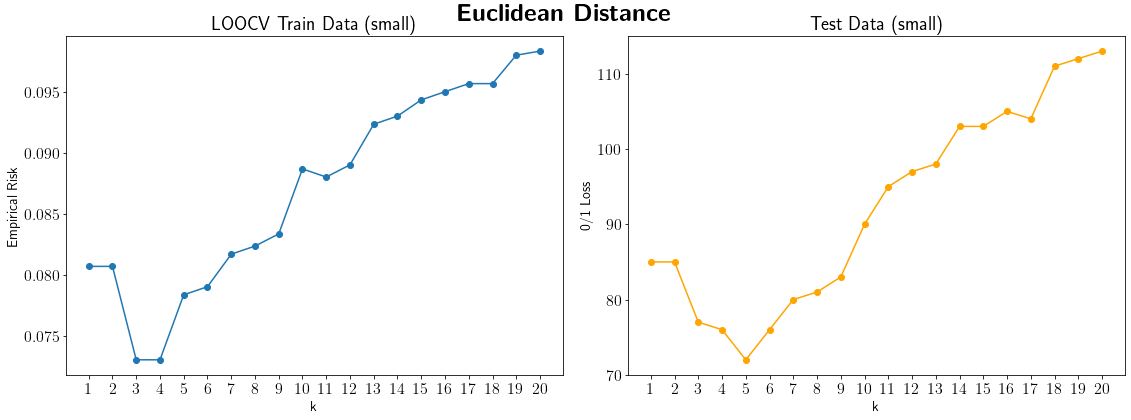

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'LOOCV Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train_LOOCV[:,1])+1)])
ax1.plot(eucl_train_LOOCV[:,1], eucl_train_LOOCV_risk, marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(1, len(eucl_test[:,1])+1)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')

fig.tight_layout()
fig.savefig(
    r'../figures/QB.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question C

In [10]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_test = get_data('minkowski', test=True, small=True, LOOCV=False)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

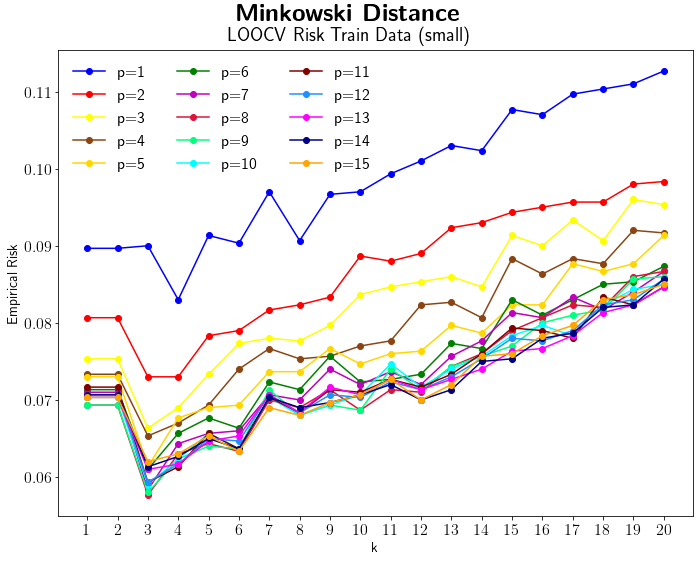

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle(r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data (small)")
# from cycler import cycler

ax1.set_prop_cycle(color=['blue', 'red', 'yellow', 'saddlebrown', 'gold', 'green', 'm', 'crimson', 'springgreen', 'aqua', 'maroon', 'dodgerblue', 'fuchsia', 'navy', 'orange'])
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train_LOOCV[:,1])+1)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={int(p)}'
    )
ax1.legend(
    loc='upper left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QC.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question D

In [12]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True, maxpooling=True)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

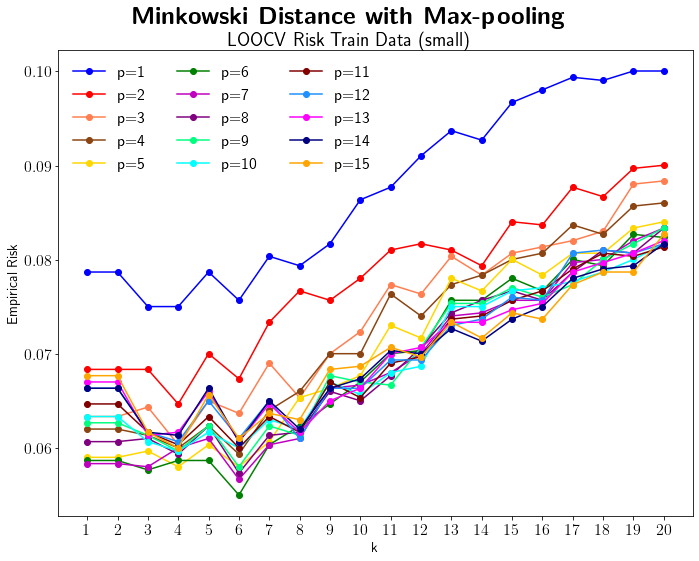

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle(r"\Huge{\textbf{Minkowski Distance with Max-pooling}}" "\n" r"LOOCV Risk Train Data (small)")

ax1.set_prop_cycle(color=[
    'blue', 'red', 'coral', 'saddlebrown', 'gold', 'green', 'm',
    'purple', 'springgreen','aqua', 'maroon', 'dodgerblue',
    'fuchsia', 'navy', 'orange'
])
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train_LOOCV[:,1])+1)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={int(p)}'
    )
ax1.legend(
    loc='upper left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QD.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

In [14]:
eucl_train_LOOCV = get_data('euclidean', test=False, small=True, LOOCV=True)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

min_maxpool_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True, maxpooling=True)
min_maxpool_LOOCV = min_maxpool_train_LOOCV[100:120][:, :2]
min_maxpool_LOOCV_risk = min_maxpool_LOOCV[:, 0]/2999

min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_train_LOOCV = min_train_LOOCV[140:160][:, :2]
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

cos_train_LOOCV = get_data('cosine', test=False, small=True, LOOCV=True)
cos_train_LOOCV = cos_train_LOOCV
cos_train_LOOCV_risk = cos_train_LOOCV[:, 0]/2999

man_train_LOOCV = get_data('manhattan', test=False, small=True, LOOCV=True)
man_train_LOOCV = man_train_LOOCV
man_train_LOOCV_risk = man_train_LOOCV[:, 0]/2999

combined_risk = [eucl_train_LOOCV_risk, min_maxpool_LOOCV_risk, min_train_LOOCV_risk, 
                 cos_train_LOOCV_risk, man_train_LOOCV_risk]
combined = ["Euclidian", "Minkowski with max pooling", "Minkowski", "Cosine", "Manhattan"]

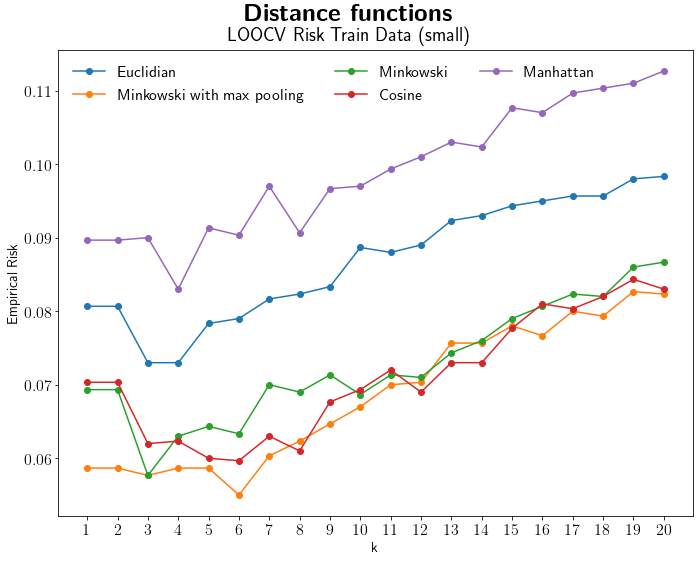

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle(r"\Huge{\textbf{Distance functions}}" "\n" r"LOOCV Risk Train Data (small)")

ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train_LOOCV[:,1])+1)])
for i, p in enumerate(combined_risk):
    ax1.plot(
        range(1, 21),
        p,
        marker='o',
        label=f'{combined[i]}'
    )
ax1.legend(
    loc='upper left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QD_2.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question E

In [18]:
min_train_loocv1 = np.loadtxt(r'../results/QE/minkowski_train_LOOCV.txt', delimiter=',')
min_train_loocv2 = np.loadtxt(r'../results/QE/minkowski_train_LOOCV_2.txt', delimiter=',')
min_train_loocv3 = np.loadtxt(r'../results/QE/minkowski_train_LOOCV_3.txt', delimiter=',')
min_train_loocv = np.vstack((min_train_loocv1, min_train_loocv2, min_train_loocv3))

In [19]:
min_train_loocv_agg = []
for k in np.sort(np.unique(min_train_loocv[:, 2])):
    k = int(k)
    k_loss = np.sum(min_train_loocv[np.where(min_train_loocv[:, 2] == k)][:, 1])
    min_train_loocv_agg.append([
        k_loss,
        k,
        8
    ])
np.savetxt(r'..\results\QE\minkowski_train_LOOCV_agg.txt', min_train_loocv_agg, delimiter=",", fmt='%s')
min_train_loocv_agg = np.array(min_train_loocv_agg)
min_train_loocv_agg_risk = min_train_loocv_agg[:, 0]/(60_000-1)

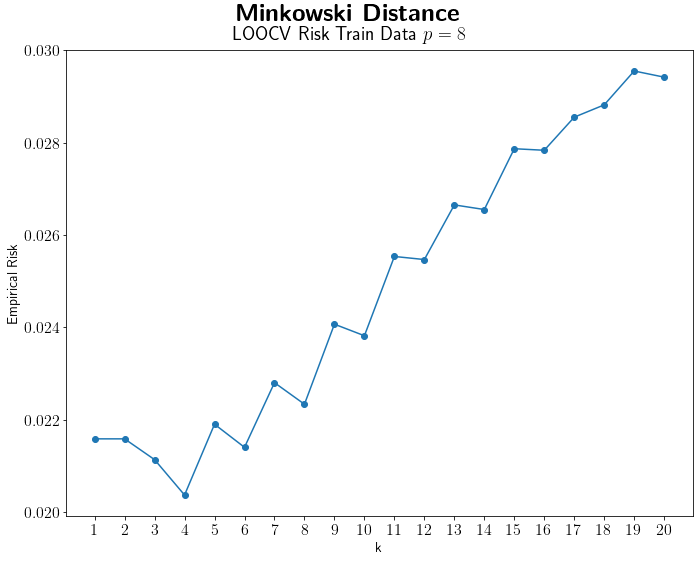

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle(r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data $p=8$")

ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(min_train_loocv_agg[:,1])+1)])
ax1.plot(min_train_loocv_agg[:, 1], min_train_loocv_agg_risk, marker='o')

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QE.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question F

In [22]:
min_test_loocv =  np.loadtxt(r'../results/QE/minkowski_test_LOOCV.txt', delimiter=',')
min_test_loocv_agg = []
for k in np.sort(np.unique(min_train_loocv[:, 2])):
    k = int(k)
    k_loss = np.sum(min_test_loocv[np.where(min_test_loocv[:, 2] == k)][:, 1])
    min_test_loocv_agg.append([
        k_loss,
        k,
        8
    ])
np.savetxt(r'../results/QE/minkowski_test_LOOCV_agg.txt', min_test_loocv_agg, delimiter=",", fmt='%s')
min_test_loocv_agg = np.array(min_test_loocv_agg)
min_test_loocv_agg_risk = min_test_loocv_agg[:, 0]/(60_000-1)

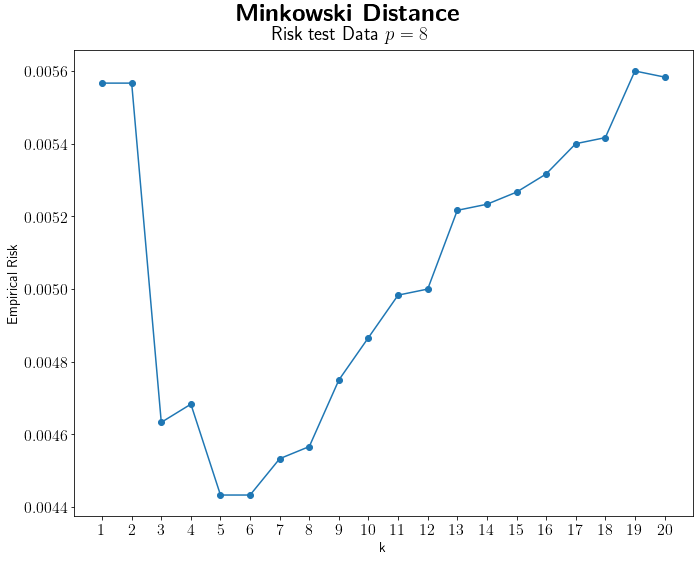

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle(r"\Huge{\textbf{Minkowski Distance}}" "\n" r"Risk test Data $p=8$")

ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(min_test_loocv_agg[:,1])+1)])
ax1.plot(min_test_loocv_agg[:, 1], min_test_loocv_agg_risk, marker='o')

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QF.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question G

In [26]:
test = []
train = []
train_risk = []
ks = []
for k in range(1, 11):
    ks.append(k)
    min_train_LOOCV = get_data(f'PCA_euclidean_{k}', test=False, small=True, LOOCV=True)
    min_test = get_data(f'PCA_euclidean_{k}', test=True, small=True, LOOCV=True)
    min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999
    test.append(min_test)
    train.append(min_train_LOOCV)
    train_risk.append(min_train_LOOCV_risk)

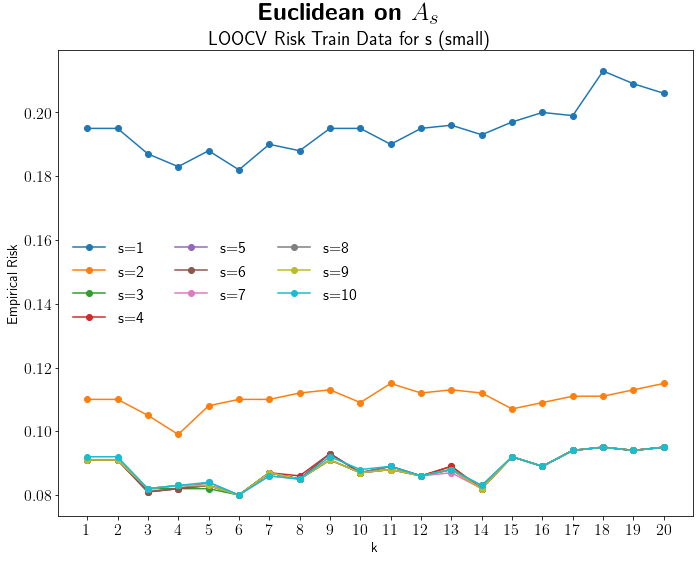

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

fig.suptitle(
    r"\Huge{\textbf{Euclidean on $A_s$}}" "\n" r"LOOCV Risk Train Data for s (small)",
)

ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(1, len(eucl_train_LOOCV[:,1])+1)])
for i, p in enumerate(test):
    ax1.plot(
        range(1, 21),
        p[:, 0]/1000,
        marker='o',
        label=f's={ks[i]}'
    )

ax1.legend(
    loc='center left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QG.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)